In [7]:
# Import libries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import lightgbm as lgb
from scipy import stats
from matplotlib.gridspec import GridSpec
from collections import Counter
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler




In [2]:
# ML Model Setup

# Relevant Variables: 

#    1. Volatile acidity
#    2. Chlorides
#    3. Free sulfur dioxide
#    4. Alcohol
#    5. Residaul Sugar

# Models:
# 1. KNN - Nearest Neighbor Algorithms

# Treat Data:
# 1. Split data --> Train vs Test
# 2. Scale data: Standard scaler

# ML Application
# 1. Red/White Predition --> R/W
# 2. Label Prediction
# 3. Label RED Pred
# 4. Label White Pred



In [3]:
# Import dataframes AND Specify a custom delimiter for the CSV input (sep=' ')

red_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Data Bases\winequality-red.csv', sep=';')
white_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Data Bases\winequality-white.csv',sep=';')

In [4]:
#creating new column

red_df['quality_label']= red_df['quality'].apply(lambda value: 'low' 
if value <= 5 else 'medium'
if value <=6 else 'high')

white_df['quality_label']= white_df['quality'].apply(lambda value: 'low' 
if value <= 5 else 'medium'
if value <=6 else 'high')

# transforming these labels into categrical data type

red_df['quality_label'] = pd.Categorical(red_df['quality_label'],
categories=['low', 'medium', 'high'])

white_df['quality_label'] = pd.Categorical(white_df['quality_label'],
categories=['low', 'medium', 'high'])

# Combine the two datasets into wines.

red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

wines = pd.concat([red_df, white_df])

# Re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=43).reset_index(drop=True)

wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,6.9,0.30,0.36,4.50,0.054,31.0,203.0,0.99513,3.40,0.57,10.4,4,low,white
1,9.0,0.40,0.43,2.40,0.068,29.0,46.0,0.99430,3.20,0.60,12.2,6,medium,red
2,7.6,0.17,0.45,11.20,0.054,56.0,137.0,0.99700,3.15,0.47,10.0,5,low,white
3,6.6,0.29,0.39,6.75,0.031,22.0,98.0,0.99130,3.15,0.80,12.9,7,high,white
4,6.1,0.28,0.22,1.80,0.034,32.0,116.0,0.98980,3.36,0.44,12.6,6,medium,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,5.0,0.33,0.18,4.60,0.032,40.0,124.0,0.99114,3.18,0.40,11.0,6,medium,white
6493,6.4,0.24,0.31,2.80,0.038,41.0,114.0,0.99155,3.37,0.66,11.7,7,high,white
6494,5.6,0.25,0.26,3.60,0.037,18.0,115.0,0.99040,3.42,0.50,12.6,6,medium,white
6495,7.4,0.35,0.31,17.95,0.062,42.0,187.0,1.00020,3.27,0.64,9.1,5,low,white


In [8]:
# Model: KNN R/W

X = wines.iloc[:, lambda df: [1, 3, 4, 5, 10]]
var_names = X.columns
y = np.array(wines['wine_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.wine_type)

stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=9, algorithm='kd_tree')
knn.fit(X_train, y_train)

pred_wines_rw_neigh= knn.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))
print(pred_wines_rw_neigh.shape)
print(y_test.shape)
print(metrics.classification_report(y_test,knn.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_rw_neigh))
print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_rw_neigh)))
print('Training accuracy: {:.4f}'.format(knn.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(knn.score(X_test,y_test)))



Counter({'white': 4408, 'red': 1439}) Counter({'white': 490, 'red': 160})
Features: ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'alcohol']
(650,)
(650,)
              precision    recall  f1-score   support

         red       0.95      0.97      0.96       160
       white       0.99      0.98      0.99       490

    accuracy                           0.98       650
   macro avg       0.97      0.98      0.98       650
weighted avg       0.98      0.98      0.98       650

[[156   4]
 [  8 482]]
Cohen-Kappa score:  0.9506703769289148
Training accuracy: 0.9728
Testing accuracy: 0.9815


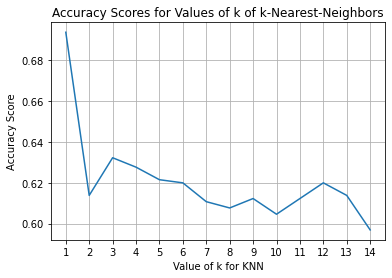

0.563076923076923


In [28]:
# Model: KNN Label

X = wines.iloc[:, lambda df:[1, 3, 4, 5, 10]]
var_names = X.columns
y = np.array(wines['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.quality_label)

stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

# experimenting with different n values
k_range = list(range(1,15))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.grid()
plt.xticks(k_range)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


In [29]:
# Model: KNN Label Results

knn = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree')
knn.fit(X_train, y_train)

pred_wines_label_neigh= knn.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_wines_label_neigh.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,knn.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_label_neigh))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_label_neigh)))
print('Training accuracy: {:.4f}'.format(knn.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(knn.score(X_test,y_test)))


Counter({'medium': 2552, 'low': 2146, 'high': 1149}) Counter({'medium': 284, 'low': 238, 'high': 128})
Features: ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'alcohol']
(650,)
(650,)
              precision    recall  f1-score   support

        high       0.67      0.64      0.65       128
         low       0.72      0.74      0.73       238
      medium       0.68      0.68      0.68       284

    accuracy                           0.69       650
   macro avg       0.69      0.69      0.69       650
weighted avg       0.69      0.69      0.69       650

[[ 82  12  34]
 [  7 176  55]
 [ 34  57 193]]
Cohen-Kappa score:  0.5179946191281795
Training accuracy: 0.9997
Testing accuracy: 0.6938


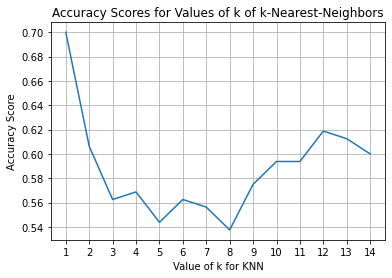

0.5875


In [38]:
# Model: KNN Label RED

X = red_df.iloc[:, lambda df:[1, 3, 4, 5, 10]]
var_names = X.columns
y = np.array(red_df['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=red_df.quality_label)

stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

# experimenting with different n values
k_range = list(range(1,15))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.grid()
plt.xticks(k_range)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


In [39]:

knn = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree')
knn.fit(X_train, y_train)

pred_red_label_neigh= knn.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_red_label_neigh.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,knn.predict(X_test)))
print(confusion_matrix(y_test,pred_red_label_neigh))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_red_label_neigh)))
print('Training accuracy: {:.4f}'.format(knn.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(knn.score(X_test,y_test)))

Counter({'low': 670, 'medium': 574, 'high': 195}) Counter({'low': 74, 'medium': 64, 'high': 22})
Features: ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'alcohol']
(160,)
(160,)
              precision    recall  f1-score   support

        high       0.55      0.50      0.52        22
         low       0.78      0.82      0.80        74
      medium       0.65      0.62      0.63        64

    accuracy                           0.70       160
   macro avg       0.66      0.65      0.65       160
weighted avg       0.70      0.70      0.70       160

[[11  2  9]
 [ 0 61 13]
 [ 9 15 40]]
Cohen-Kappa score:  0.5019455252918288
Training accuracy: 1.0000
Testing accuracy: 0.7000


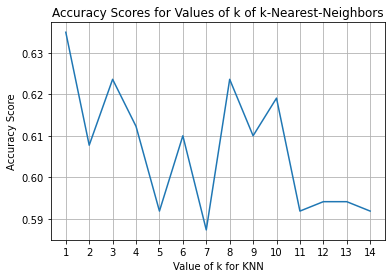

0.562358276643991


In [46]:
# Model: KNN Label White

X = white_df.iloc[:, lambda df:[1, 3, 4, 5, 10]]
var_names = X.columns
y = np.array(white_df['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.09, random_state=42, stratify=white_df.quality_label)

stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

# experimenting with different n values
k_range = list(range(1,15))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.grid()
plt.xticks(k_range)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

In [50]:
# Model: KNN Label White Results

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree')
knn.fit(X_train, y_train)

pred_white_label_neigh= knn.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_white_label_neigh.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,knn.predict(X_test)))
print(confusion_matrix(y_test,pred_white_label_neigh))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_white_label_neigh)))
print('Training accuracy: {:.4f}'.format(knn.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(knn.score(X_test,y_test)))

Counter({'medium': 2000, 'low': 1492, 'high': 965}) Counter({'medium': 198, 'low': 148, 'high': 95})
Features: ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'alcohol']
(441,)
(441,)
              precision    recall  f1-score   support

        high       0.53      0.56      0.54        95
         low       0.68      0.72      0.70       148
      medium       0.62      0.58      0.60       198

    accuracy                           0.62       441
   macro avg       0.61      0.62      0.62       441
weighted avg       0.62      0.62      0.62       441

[[ 53   7  35]
 [  7 107  34]
 [ 40  43 115]]
Cohen-Kappa score:  0.4158147997414474
Training accuracy: 0.6774
Testing accuracy: 0.6236


In [ ]:
# Model: Random Forest R/W

X = wines.iloc[:, lambda df: [1, 4, 5, 10]]
var_names = X.columns
y = np.array(wines['wine_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.wine_type)


rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

pred_wines_rw_forest= clf.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_wines_rw_forest.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,clf.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_rw_forest))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_rw_forest)))
print('Training accuracy: {:.4f}'.format(clf.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(clf.score(X_test,y_test)))




Counter({'white': 4408, 'red': 1439}) Counter({'white': 490, 'red': 160})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
(650,)
(650,)
              precision    recall  f1-score   support

         red       0.95      0.96      0.95       160
       white       0.99      0.98      0.98       490

    accuracy                           0.98       650
   macro avg       0.97      0.97      0.97       650
weighted avg       0.98      0.98      0.98       650

[[153   7]
 [  8 482]]
Cohen-Kappa score:  0.9379494685928849
Training accuracy: 0.9997
Testing accuracy: 0.9769


In [ ]:
# Model: Random Forest Label

X = wines.iloc[:, lambda df: [1, 4, 5, 10]]
var_names = X.columns
y = np.array(wines['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.quality_label)


rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)


pred_wines_label_forest= clf.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_wines_label_forest.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,clf.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_label_forest))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_label_forest)))
print('Training accuracy: {:.4f}'.format(clf.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(clf.score(X_test,y_test)))




Counter({'medium': 2552, 'low': 2146, 'high': 1149}) Counter({'medium': 284, 'low': 238, 'high': 128})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
(650,)
(650,)
              precision    recall  f1-score   support

        high       0.64      0.55      0.59       128
         low       0.69      0.74      0.71       238
      medium       0.65      0.65      0.65       284

    accuracy                           0.66       650
   macro avg       0.66      0.65      0.65       650
weighted avg       0.66      0.66      0.66       650

[[ 70  12  46]
 [  7 175  56]
 [ 33  65 186]]
Cohen-Kappa score:  0.46615813869762834
Training accuracy: 0.9995
Testing accuracy: 0.6631


In [ ]:
# Model: Random Forest Class

X = wines.iloc[:, lambda df: [1, 4, 5, 10]]
var_names = X.columns
y = np.array(wines['quality'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=wines.quality)

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

pred_wines_class_forest= clf.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_wines_class_forest.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,clf.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_class_forest))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_class_forest)))
print('Training accuracy: {:.4f}'.format(clf.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(clf.score(X_test,y_test)))



Counter({6: 2410, 5: 1817, 7: 917, 4: 184, 8: 164, 3: 26, 9: 4}) Counter({6: 426, 5: 321, 7: 162, 4: 32, 8: 29, 3: 4, 9: 1})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
(975,)
(975,)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.42      0.16      0.23        32
           5       0.68      0.73      0.70       321
           6       0.66      0.73      0.70       426
           7       0.66      0.54      0.59       162
           8       0.62      0.28      0.38        29
           9       0.00      0.00      0.00         1

    accuracy                           0.66       975
   macro avg       0.43      0.35      0.37       975
weighted avg       0.65      0.66      0.65       975

[[  0   0   4   0   0   0   0]
 [  0   5  17   9   1   0   0]
 [  0   6 234  75   6   0   0]
 [  0   1  74 313  33   5   0]
 [  0   0  13  61  88   0   0]
 [  0   0   2  13   6   8   0]


C:\Users\jspad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jspad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jspad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy: 0.9995
Testing accuracy: 0.6646


In [ ]:
# Model: lightgbm.Booster R/W

# from sklearn import metrics
# import lightgbm as lgb

X = wines.iloc[:, lambda df: [1, 4, 5, 10]]#[:,:-3]
var_names = X.columns
y = np.array(wines['wine_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.wine_type)


rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)


lgbmc = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-1,random_state=42, n_estimators=100)
lgbmc.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)])#, verbose=20,eval_metric='logloss')

pred_wines_rw_lgbmc= lgbmc.predict(X_test)

# print(Counter(y_train), Counter(y_test))
# print('Features:', list(var_names))
# # print(pred_wines_rw_lgbmc.shape)
# # print(y_test.shape)

# lgb.plot_importance(lgbmc)
# lgb.plot_metric(lgbmc)

# print(classification_report(y_test,pred_wines_rw_lgbmc, target_names=['red', 'white']))
# print(confusion_matrix(y_test,pred_wines_rw_lgbmc))
# print("Percentage of accurancy of the model with Cohen-Kappa score is: ", (cohen_kappa_score(y_test,pred_wines_rw_lgbmc))*100, "%")


[1]	training's binary_logloss: 0.485413	valid_0's binary_logloss: 0.487485
[2]	training's binary_logloss: 0.430585	valid_0's binary_logloss: 0.432057
[3]	training's binary_logloss: 0.386838	valid_0's binary_logloss: 0.388293
[4]	training's binary_logloss: 0.350174	valid_0's binary_logloss: 0.351148
[5]	training's binary_logloss: 0.319384	valid_0's binary_logloss: 0.320906
[6]	training's binary_logloss: 0.292982	valid_0's binary_logloss: 0.294238
[7]	training's binary_logloss: 0.269829	valid_0's binary_logloss: 0.271332
[8]	training's binary_logloss: 0.249755	valid_0's binary_logloss: 0.251605
[9]	training's binary_logloss: 0.23207	valid_0's binary_logloss: 0.233546
[10]	training's binary_logloss: 0.216207	valid_0's binary_logloss: 0.217862
[11]	training's binary_logloss: 0.201876	valid_0's binary_logloss: 0.203781
[12]	training's binary_logloss: 0.188964	valid_0's binary_logloss: 0.191254
[13]	training's binary_logloss: 0.177452	valid_0's binary_logloss: 0.1801
[14]	training's binary_l

Counter({'white': 4408, 'red': 1439}) Counter({'white': 490, 'red': 160})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
(650,)
(650,)
              precision    recall  f1-score   support

         red       0.96      0.95      0.95       160
       white       0.98      0.99      0.98       490

    accuracy                           0.98       650
   macro avg       0.97      0.97      0.97       650
weighted avg       0.98      0.98      0.98       650

[[152   8]
 [  7 483]]
Cohen-Kappa score:  0.9376877356681792
Training accuracy: 0.9949
Testing accuracy: 0.9769


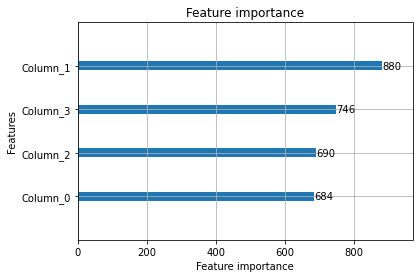

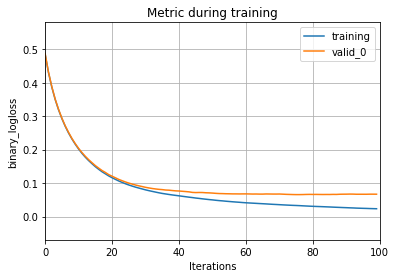

In [ ]:
# Results Model LGBM Booster R/W

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_wines_rw_lgbmc.shape)
print(y_test.shape)

lgb.plot_importance(lgbmc)
lgb.plot_metric(lgbmc)
#lgb.plot_tree(lgbmc,figsize=(30,40))

print(metrics.classification_report(y_test,lgbmc.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_rw_lgbmc))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_rw_lgbmc)))
print('Training accuracy: {:.4f}'.format(lgbmc.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(lgbmc.score(X_test,y_test)))

In [ ]:
# Model: lightgbm.Booster Label

X = wines.iloc[:, lambda df: [1, 4, 5, 10]]#[:,:-3]
var_names = X.columns
y = np.array(wines['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.quality_label)

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)


lgbmc = lgb.LGBMClassifier(learning_rate=0.09,max_depth=1000,random_state=42, n_estimators=35)
lgbmc.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)], verbose=20,eval_metric='logloss')

pred_wines_label_lgbmc= lgbmc.predict(X_test)



[20]	training's multi_logloss: 0.770419	valid_0's multi_logloss: 0.832311


C:\Users\jspad\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Counter({'medium': 2552, 'low': 2146, 'high': 1149}) Counter({'medium': 284, 'low': 238, 'high': 128})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
(650,)
(650,)
              precision    recall  f1-score   support

        high       0.63      0.44      0.52       128
         low       0.67      0.70      0.69       238
      medium       0.59      0.65      0.62       284

    accuracy                           0.63       650
   macro avg       0.63      0.60      0.61       650
weighted avg       0.63      0.63      0.63       650

[[ 56  14  58]
 [  2 167  69]
 [ 31  67 186]]
Cohen-Kappa score:  0.40480713699504545
Training accuracy: 0.6937
Testing accuracy: 0.6292


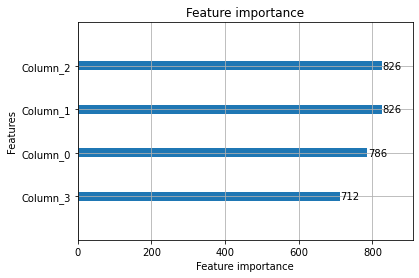

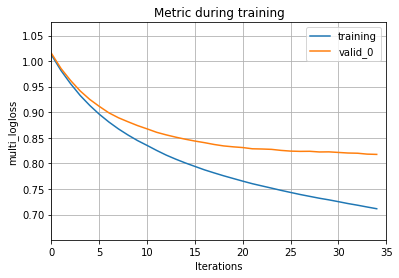

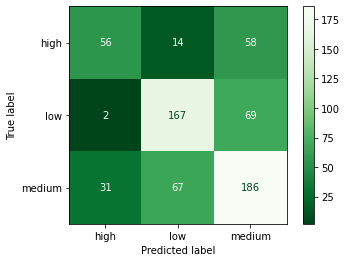

In [ ]:
#Results Model LGBM Booster Label

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_wines_label_lgbmc.shape)
print(y_test.shape)

lgb.plot_importance(lgbmc)
lgb.plot_metric(lgbmc)
metrics.plot_confusion_matrix(lgbmc,X_test,y_test,cmap='Greens_r')
#lgb.plot_tree(lgbmc,figsize=(30,40))

print(metrics.classification_report(y_test,lgbmc.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_label_lgbmc))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_label_lgbmc)))
print('Training accuracy: {:.4f}'.format(lgbmc.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(lgbmc.score(X_test,y_test)))

In [ ]:
# Model: lightgbm.Booster Label RED

X = red_df.iloc[:, lambda df: [1, 4, 5, 10]]#[:,:-3]
var_names = X.columns
y = np.array(red_df['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=red_df.quality_label)

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)


lgbmc = lgb.LGBMClassifier(learning_rate=0.09,max_depth=10,random_state=42, n_estimators=30)
lgbmc.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)])#, verbose=20,eval_metric='logloss')

pred_red_label_lgbmc= lgbmc.predict(X_test)

[1]	training's multi_logloss: 0.940768	valid_0's multi_logloss: 0.959698
[2]	training's multi_logloss: 0.897734	valid_0's multi_logloss: 0.93278
[3]	training's multi_logloss: 0.860271	valid_0's multi_logloss: 0.908104
[4]	training's multi_logloss: 0.829128	valid_0's multi_logloss: 0.891039
[5]	training's multi_logloss: 0.802243	valid_0's multi_logloss: 0.875609
[6]	training's multi_logloss: 0.778831	valid_0's multi_logloss: 0.865374
[7]	training's multi_logloss: 0.757917	valid_0's multi_logloss: 0.856702
[8]	training's multi_logloss: 0.737781	valid_0's multi_logloss: 0.849706
[9]	training's multi_logloss: 0.719556	valid_0's multi_logloss: 0.842154
[10]	training's multi_logloss: 0.702783	valid_0's multi_logloss: 0.835882
[11]	training's multi_logloss: 0.687099	valid_0's multi_logloss: 0.8293
[12]	training's multi_logloss: 0.672878	valid_0's multi_logloss: 0.823829
[13]	training's multi_logloss: 0.658775	valid_0's multi_logloss: 0.819569
[14]	training's multi_logloss: 0.646214	valid_0's 

Counter({'low': 670, 'medium': 574, 'high': 195}) Counter({'low': 74, 'medium': 64, 'high': 22})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
(160,)
(160,)
              precision    recall  f1-score   support

        high       0.42      0.36      0.39        22
         low       0.66      0.80      0.72        74
      medium       0.58      0.47      0.52        64

    accuracy                           0.61       160
   macro avg       0.55      0.54      0.54       160
weighted avg       0.60      0.61      0.60       160

[[ 8  6  8]
 [ 1 59 14]
 [10 24 30]]
Cohen-Kappa score:  0.3397956510348442
Training accuracy: 0.8304
Testing accuracy: 0.6062


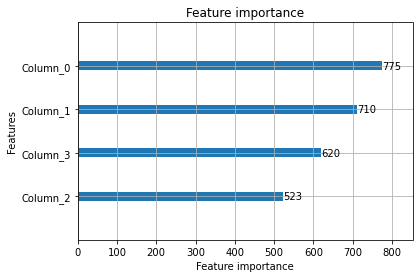

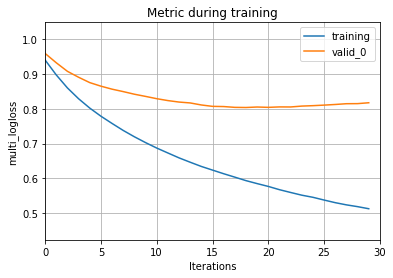

In [ ]:
#Results Model LGBM Booster Label RED

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_red_label_lgbmc.shape)
print(y_test.shape)

lgb.plot_importance(lgbmc)
lgb.plot_metric(lgbmc)
#lgb.plot_tree(lgbmc,figsize=(30,40))

print(metrics.classification_report(y_test,lgbmc.predict(X_test)))
print(confusion_matrix(y_test,pred_red_label_lgbmc))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_red_label_lgbmc)))
print('Training accuracy: {:.4f}'.format(lgbmc.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(lgbmc.score(X_test,y_test)))

In [ ]:
# Model: lightgbm.Booster Label White

X = white_df.iloc[:, lambda df: [1, 3, 4, 5, 10]]#[:, lambda df: [3, 5, 7, 10]]#[:, lambda df: [1, 2, 3, 4, 5, 8, 9, 10]]#[:,:-3]##
var_names = X.columns
y = np.array(white_df['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=white_df.quality_label)

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

lgbmc = lgb.LGBMClassifier(boosting_type='gbdt',learning_rate=0.09,max_depth=-1,random_state=42, n_estimators=20)
lgbmc.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)])#, verbose=20,eval_metric='logloss')

pred_white_label_lgbmc= lgbmc.predict(X_test)

[1]	training's multi_logloss: 1.01377	valid_0's multi_logloss: 1.0217
[2]	training's multi_logloss: 0.977924	valid_0's multi_logloss: 0.992494
[3]	training's multi_logloss: 0.947286	valid_0's multi_logloss: 0.969258
[4]	training's multi_logloss: 0.921018	valid_0's multi_logloss: 0.949
[5]	training's multi_logloss: 0.897853	valid_0's multi_logloss: 0.931152
[6]	training's multi_logloss: 0.877923	valid_0's multi_logloss: 0.91685
[7]	training's multi_logloss: 0.859588	valid_0's multi_logloss: 0.904314
[8]	training's multi_logloss: 0.841938	valid_0's multi_logloss: 0.89345
[9]	training's multi_logloss: 0.826655	valid_0's multi_logloss: 0.882725
[10]	training's multi_logloss: 0.813204	valid_0's multi_logloss: 0.87317
[11]	training's multi_logloss: 0.800481	valid_0's multi_logloss: 0.865859
[12]	training's multi_logloss: 0.788662	valid_0's multi_logloss: 0.859193
[13]	training's multi_logloss: 0.778023	valid_0's multi_logloss: 0.853698
[14]	training's multi_logloss: 0.767781	valid_0's multi_

Counter({'medium': 1758, 'low': 1312, 'high': 848}) Counter({'medium': 440, 'low': 328, 'high': 212})
Features: ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'alcohol']
(980,)
(980,)
              precision    recall  f1-score   support

        high       0.63      0.42      0.50       212
         low       0.69      0.62      0.65       328
      medium       0.57      0.70      0.63       440

    accuracy                           0.61       980
   macro avg       0.63      0.58      0.59       980
weighted avg       0.62      0.61      0.61       980

[[ 88   9 115]
 [  3 204 121]
 [ 49  83 308]]
Cohen-Kappa score:  0.3733509234828496
Training accuracy: 0.7070
Testing accuracy: 0.6122


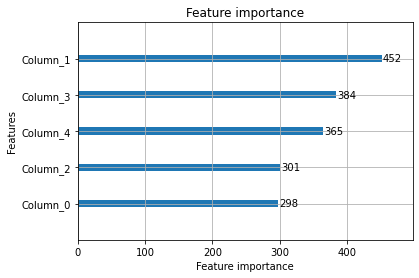

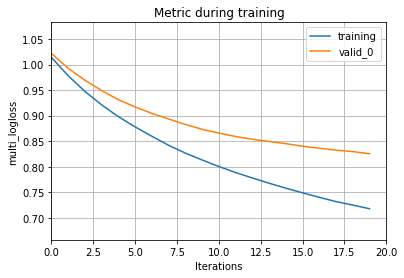

In [ ]:
#Results Model LGBM Booster Label White

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_white_label_lgbmc.shape)
print(y_test.shape)

lgb.plot_importance(lgbmc)
lgb.plot_metric(lgbmc)
#lgb.plot_tree(lgbmc,figsize=(30,40))

print(metrics.classification_report(y_test,lgbmc.predict(X_test)))
print(confusion_matrix(y_test,pred_white_label_lgbmc))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_white_label_lgbmc)))
print('Training accuracy: {:.4f}'.format(lgbmc.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(lgbmc.score(X_test,y_test)))

In [ ]:
# Prova viulenza

# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_moons, make_circles, make_classification
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# names = ["Nearest Neighbors","Linear SVM","RBF SVM","Gaussian Process","Decision Tree","Random Forest","Neural Net","AdaBoost","Naive Bayes","QDA",]

# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
# ]

# X = wines.iloc[:, lambda df: [3, 5, 7, 10]]
# var_names = X.columns
# y = np.array(wines['wine_type'])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.wine_type)


# figure = plt.figure(figsize=(27, 9))
# i = 1
# # iterate over datasets
# for ds_cnt, ds in enumerate(wines):
#     # preprocess dataset, split into training and test part
#     rs=RobustScaler()
#     X_train = rs.fit_transform(X_train)
#     X_test = rs.fit_transform(X_test)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.wine_type)
   

#     # x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
#     # y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
#     # xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#     # just plot the dataset first
#     cm = plt.cm.RdBu
#     cm_bright = ListedColormap(["#FF0000", "#0000FF"])
#     ax = plt.subplot(len(wines), len(classifiers) + 1, i)
#     if ds_cnt == 0:
#         ax.set_title("Input data")
#     # Plot the training points
#     ax.scatter(X_train, X_train, c=y_train, cmap=cm_bright, edgecolors="k")
#     # Plot the testing points
#     ax.scatter(
#         X_test, X_test, c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
#     )
#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xticks(())
#     ax.set_yticks(())
#     i += 1

#     # iterate over classifiers
#     for name, clf in zip(names, classifiers):
#         ax = plt.subplot(len(wines), len(classifiers) + 1, i)
#         clf.fit(X_train, y_train)
#         score = clf.score(X_test, y_test)

#         # Plot the decision boundary. For that, we will assign a color to each
#         # point in the mesh [x_min, x_max]x[y_min, y_max].
#         if hasattr(clf, "decision_function"):
#             Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#         else:
#             Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

#         # Put the result into a color plot
#         Z = Z.reshape(xx.shape)
#         ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

#         # Plot the training points
#         ax.scatter(
#             X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
#         )
#         # Plot the testing points
#         ax.scatter(
#             X_test[:, 0],
#             X_test[:, 1],
#             c=y_test,
#             cmap=cm_bright,
#             edgecolors="k",
#             alpha=0.6,
#         )

#         ax.set_xlim(xx.min(), xx.max())
#         ax.set_ylim(yy.min(), yy.max())
#         ax.set_xticks(())
#         ax.set_yticks(())
#         if ds_cnt == 0:
#             ax.set_title(name)
#         ax.text(
#             xx.max() - 0.3,
#             yy.min() + 0.3,
#             ("%.2f" % score).lstrip("0"),
#             size=15,
#             horizontalalignment="right",
#         )
#         i += 1

# plt.tight_layout()
# plt.show()

In [ ]:
#pip install lightgbm

In [ ]:
#pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#%reset